In [1]:
import os
import pandas as pd
import geopandas as gpd
import re
import string
import unicodedata
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns
import matplotlib.cm as cm

In [2]:
manchester_map = gpd.read_file('manchester_boundary.shp')


In [3]:
manchester_map = manchester_map.to_crs('epsg:27700')

<AxesSubplot:>

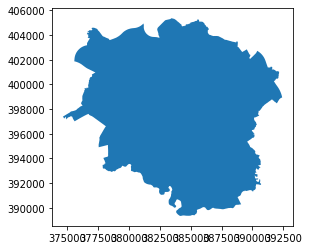

In [4]:
manchester_map.plot()

In [5]:
local_authority = gpd.read_file('LAD_MAY_2021_UK_BFE_V2.shp')

In [6]:
local_authority

,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
0,1,E06000001,Hartlepool,447160,531474,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,2,E06000002,Middlesbrough,451141,516887,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,3,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,4,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,5,E06000005,Darlington,428029,515648,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...
369,370,W06000020,Torfaen,327459,200480,-3.05101,51.698360,82544.770980,1.262399e+08,"POLYGON ((323898.201 211287.499, 324115.698 21..."
370,371,W06000021,Monmouthshire,337812,209231,-2.90280,51.778271,250879.753346,8.860439e+08,"MULTIPOLYGON (((345965.201 181030.700, 345944...."
371,372,W06000022,Newport,337897,187432,-2.89769,51.582310,135651.510102,2.175180e+08,"POLYGON ((342211.900 194845.495, 342221.803 19..."
372,373,W06000023,Powys,302329,273255,-3.43531,52.348640,606560.015329,5.195456e+09,"POLYGON ((322392.901 334017.198, 322378.002 33..."


In [7]:
man = local_authority[local_authority['LAD21NM']=='Manchester']

In [8]:
man = man.to_crs('epsg:27700')

<AxesSubplot:>

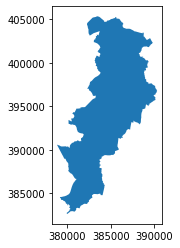

In [9]:
man.plot()

In [10]:
url='./DV_CSC8626_Data_Wrangled/Datafile_003.csv'

In [12]:
data_003 = pd.read_csv(url)

In [13]:
data_003.head(4)

,x,y,cell_id,population,infected_DM_0,infected_DM_1,infected_DM_2,infected_DM_3,u,var,sd,IoD,CoV
0,-2.265692,53.444722,-7.903445e+18,59,0,1,1,2,1.00,0.666667,0.816497,0.666667,0.816497
1,-2.265782,53.459104,8.320480e+18,166,1,1,1,1,1.00,0.000000,0.000000,0.000000,0.000000
2,-2.265860,53.471687,3.409798e+18,125,1,0,1,0,0.50,0.333333,0.577350,0.666667,1.154701
3,-2.265990,53.492360,-2.365719e+18,62,0,0,1,0,0.25,0.250000,0.500000,1.000000,2.000000


In [14]:
data_003.iloc[3].u

0.25

In [48]:
gdf_data_000 = gpd.GeoDataFrame(data_000, geometry=gpd.points_from_xy(data_000.x, data_000.y, crs='epsg:4326'))

NameError: name 'data_000' is not defined

In [12]:
gdf_data_000 = gdf_data_000.to_crs('epsg:27700')

<AxesSubplot:>

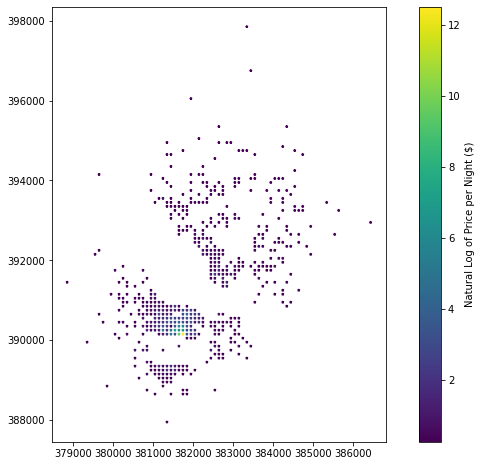

In [43]:
gdf_data_000.plot(column='u',marker='*', markersize=5,figsize=(12,8),legend=True,legend_kwds={'label': "Natural Log of Price per Night ($)",
                        'orientation': "vertical"})

In [15]:
def data_read_plot(url):
    '''
    print out the shape of a dataframe, the percentage of features without missing values and the columns with high missing rates
    '''
    data = pd.read_csv(url)
    gdf_data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.x, data.y, crs='epsg:4326'))
    gdf_data_crs = gdf_data.to_crs('epsg:27700')
    
    fig, ax = plt.subplots(1,1, figsize=(12,9))
    manchester_map.plot(ax=ax,edgecolor='r',facecolor= 'white',linewidth=1)
    gdf_data_crs.plot(ax=ax,column='u',marker='*', markersize=0.25,figsize=(12,8),legend=True,legend_kwds={'label': "Average number of infections",
                        'orientation': "vertical"})
    

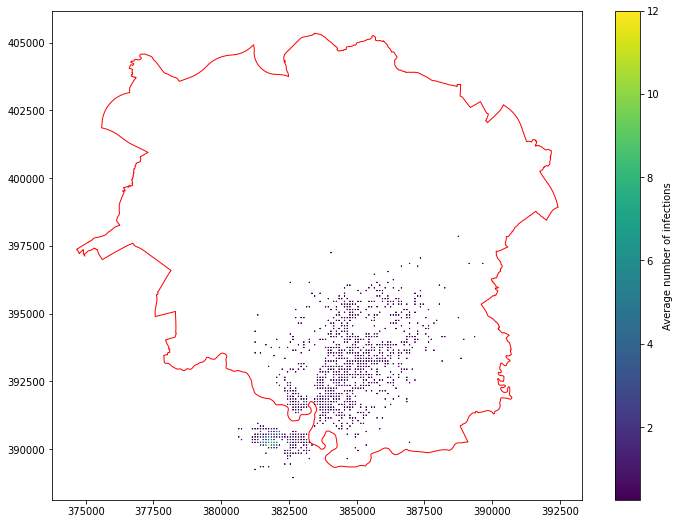

In [20]:
data_read_plot("./DV_CSC8626_Data_Wrangled/Datafile_011.csv")

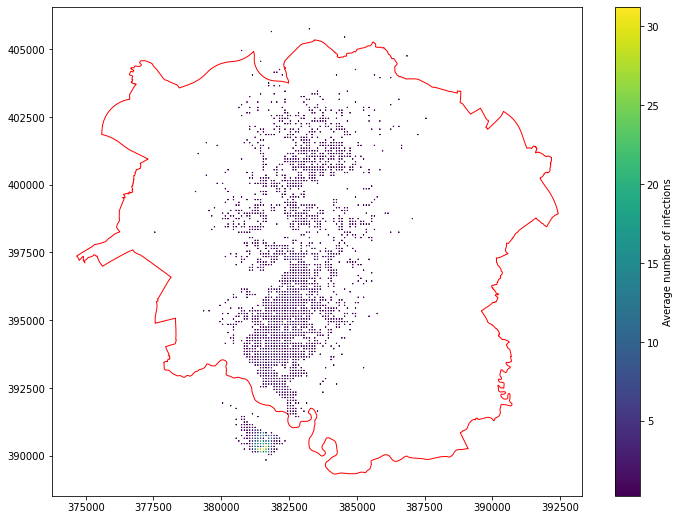

In [21]:
data_read_plot("./DV_CSC8626_Data_Wrangled/Datafile_010.csv")

In [63]:
for i in range(0,250):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [22]:
def cell_coordinate(m,n):
    
    #cell_coord = {}
    cell_DataFrame = pd.DataFrame()
    for i in range(m,n):
        if i <10:
            url = './DV_CSC8626_Data_Wrangled/Datafile_00' + str(i) +'.csv'
        elif i<100:
            url = './DV_CSC8626_Data_Wrangled/Datafile_0' + str(i) +'.csv'
        else:
            url = './DV_CSC8626_Data_Wrangled/Datafile_' + str(i) +'.csv'
        
        data = pd.read_csv(url)
        cell_DataFrame = cell_DataFrame.append(data)
        

        
        
        #for j in range(len(data)):
            
            #cell_dict[some_key] = my_dict.get(some_key, 0)
            
           # cell_dic[data.iloc[j].cell_id] = cell_dic.get(data.iloc[j].cell_id, 0)
            
            #cell_dic[data.iloc[j].cell_id] = cell_dic[data.iloc[j].cell_id] + data.iloc[j].u
            
    return cell_DataFrame.drop_duplicates(subset=['cell_id'])

In [23]:
def data_aggregate(m,n):
    
    cell_dic = {}
    
    for i in range(m,n):
        if i <10:
            url = './DV_CSC8626_Data_Wrangled/Datafile_00' + str(i) +'.csv'
        elif i<100:
            url = './DV_CSC8626_Data_Wrangled/Datafile_0' + str(i) +'.csv'
        else:
            url = './DV_CSC8626_Data_Wrangled/Datafile_' + str(i) +'.csv'
        
        data = pd.read_csv(url)
        for j in range(len(data)):
            
            #cell_dict[some_key] = my_dict.get(some_key, 0)
            
            cell_dic[data.iloc[j].cell_id] = cell_dic.get(data.iloc[j].cell_id, 0)+ data.iloc[j].u
            
            #cell_dic[data.iloc[j].cell_id] = cell_dic[data.iloc[j].cell_id] + data.iloc[j].u
            
    return pd.DataFrame(cell_dic.items(),columns=['cell_id', 'sum'])
            
        

In [69]:
data_aggregate(0,9)

,cell_id,sum
0,6.504529e+18,9.75
1,8.685601e+18,10.50
2,-6.954263e+18,8.75
3,6.558309e+18,4.25
4,-7.941757e+17,3.75
...,...,...
5606,-7.529588e+18,0.25
5607,-4.724717e+18,0.25
5608,-8.326600e+18,0.25
5609,9.080431e+18,0.25


In [24]:
def data_aggregate_new(m,n):
    
    cell_dic = {}
    list = []
    
    for i in range(m,n):
        if i <10:
            url = './DV_CSC8626_Data_Wrangled/Datafile_00' + str(i) +'.csv'
        elif i<100:
            url = './DV_CSC8626_Data_Wrangled/Datafile_0' + str(i) +'.csv'
        else:
            url = './DV_CSC8626_Data_Wrangled/Datafile_' + str(i) +'.csv'
        
        data = pd.read_csv(url)
        for j in range(len(data)):
            
            #cell_dict[some_key] = my_dict.get(some_key, 0)
            #cell_dic[data.iloc[j].cell_id] = []
            #list.append()
            
            cell_dic[data.iloc[j].cell_id] = cell_dic.get(data.iloc[j].cell_id, list).append(data.iloc[j].u)
            
            #cell_dic[data.iloc[j].cell_id] = cell_dic[data.iloc[j].cell_id] + data.iloc[j].u
            
    return cell_dic
            

In [78]:
#cell_dict = {}
#cell_list = []

In [42]:
from collections import defaultdict

In [43]:
cell_dict = defaultdict(list)

TypeError: first argument must be callable or None

In [25]:
cell_dict = {}
for i in range(0,250):
        if i <10:
            url = './DV_CSC8626_Data_Wrangled/Datafile_00' + str(i) +'.csv'
        elif i<100:
            url = './DV_CSC8626_Data_Wrangled/Datafile_0' + str(i) +'.csv'
        else:
            url = './DV_CSC8626_Data_Wrangled/Datafile_' + str(i) +'.csv'
            
        
        data = pd.read_csv(url)
        for j in range(len(data)):
            
            
           #if data.iloc[j].cell_id == 6504529144908220000:
            
            #cell_dict[some_key] = my_dict.get(some_key, 0)
                value = data.iloc[j].u
                if data.iloc[j].cell_id in cell_dict:
                    cell_dict[data.iloc[j].cell_id].append(value)
                else:
                    cell_dict[data.iloc[j].cell_id] = []
                    cell_dict[data.iloc[j].cell_id].append(value)
                    
                
                
            #list.append()
            
            #if data.iloc[j].cell_id in cell_dict:
               # cell_dict[data.iloc[j].cell_id].append(data.iloc[j].u)
            #else:
               # cell_dict[data.iloc[j].cell_id] = [] # this is core of setdefault equals to new.setdefault(key, [])
                #new[key].append(value)
               # cell_dict[data.iloc[j].cell_id].append(data.iloc[j].u)
                
            #cell_dict.setdefault(data.iloc[j].cell_id,[]).append(data.iloc[j].u)
            
            
                

                
            
            #cell_dic[data.iloc[j].cell_id] = cell_dic[data.iloc[j].cell_id] + data.iloc[j].u

In [80]:
cell_dict

{6.50452914490822e+18: [0.25, 3.75, 0.25, 0.5, 0.75, 1.0, 0.75, 2.5],
 8.68560051705832e+18: [0.25, 4.0, 0.5, 0.25, 0.5, 1.75, 0.25, 3.0],
 -6.95426317223508e+18: [0.5, 2.75, 0.5, 0.75, 1.75, 2.5],
 6.558309216546044e+18: [0.25, 0.5, 2.75, 0.5, 0.25],
 -7.941756719447872e+17: [1.0, 0.75, 0.75, 0.5, 0.75],
 -5.441153801290022e+18: [0.75, 16.25, 1.25, 3.0, 1.75, 1.5, 2.25, 3.0],
 -5.944133414741827e+18: [0.5, 4.75, 0.25, 0.5, 1.5, 1.25, 0.25, 1.0, 3.0],
 -6.104919003042739e+18: [0.25, 5.5, 0.75, 0.25, 0.25, 1.25, 0.5, 2.0],
 -6.054602705832648e+18: [0.5, 0.25, 2.0, 1.5, 0.5],
 5.17394474541024e+18: [0.5, 4.0, 0.25, 2.0, 1.5, 1.5, 1.25],
 1.878073865649756e+18: [0.75, 9.0, 0.25, 0.25, 4.5, 1.75, 0.5, 1.25, 2.0],
 -6.359262275304227e+18: [1.25, 4.75, 0.25, 1.75, 1.25, 0.5, 0.75],
 -3.1864631728776515e+18: [0.25, 3.0, 0.25, 0.5, 0.75, 0.25, 1.25],
 4.728380058564738e+18: [0.25, 8.75, 1.5, 0.25, 1.25, 0.75, 3.5, 1.75, 4.25],
 -4.3474295811440113e+18: [0.25, 6.0, 1.0, 0.5, 0.75, 0.75, 3.5, 1.

In [28]:
len(cell_dict)

19716

In [108]:
y = {}
for i in cell_dict:
    
    sum_value = sum(cell_dict[i])
    y[i] = []
    y[i].append(sum_value)

In [109]:
y

{6.50452914490822e+18: [9.75],
 8.68560051705832e+18: [10.5],
 -6.95426317223508e+18: [8.75],
 6.558309216546044e+18: [4.25],
 -7.941756719447872e+17: [3.75],
 -5.441153801290022e+18: [29.75],
 -5.944133414741827e+18: [13.0],
 -6.104919003042739e+18: [10.75],
 -6.054602705832648e+18: [4.75],
 5.17394474541024e+18: [11.0],
 1.878073865649756e+18: [20.25],
 -6.359262275304227e+18: [10.5],
 -3.1864631728776515e+18: [6.25],
 4.728380058564738e+18: [22.25],
 -4.3474295811440113e+18: [17.25],
 -5.57717648527482e+18: [2.75],
 -4.182704147092e+18: [17.0],
 -7.727797502955529e+18: [10.75],
 -8.601520540072993e+17: [13.0],
 -5.300423288364413e+18: [2.75],
 -8.275522262796307e+18: [2.5],
 8.072546588513413e+18: [1.5],
 7.480125240018e+18: [1.25],
 8.670404234424252e+18: [1.25],
 5.088858815127455e+18: [2.75],
 -7.687502650302206e+18: [0.25],
 8.472544758162133e+18: [7.0],
 1.0683790282188992e+18: [0.5],
 -7.932639458173423e+18: [0.25],
 -1.5242544356434435e+18: [0.75],
 2.576591799082665e+18: [1.

In [104]:
sum_value

0.25

In [29]:
x = cell_dict[8.68560051705832e+18]

In [30]:
x

[0.25,
 4.0,
 0.5,
 0.25,
 0.5,
 1.75,
 0.25,
 3.0,
 0.5,
 1.25,
 1.25,
 1.75,
 1.25,
 0.25,
 0.25,
 4.0,
 2.75,
 0.75,
 2.75,
 1.0,
 0.25,
 0.75,
 0.5,
 1.75,
 2.0,
 7.0,
 1.5,
 4.5,
 1.5,
 1.0,
 0.5,
 0.25,
 0.25,
 1.0,
 2.75,
 0.5,
 2.75,
 1.75,
 0.25,
 1.5,
 4.5,
 2.25,
 0.75,
 1.5,
 1.5,
 5.25,
 1.75,
 4.5,
 1.25,
 2.5,
 0.75,
 1.0,
 1.25,
 3.0,
 0.25,
 0.75,
 0.25,
 1.5,
 1.75,
 1.75,
 0.5,
 0.5,
 1.5,
 1.5,
 2.5,
 1.75,
 0.75,
 2.0,
 2.25,
 0.25,
 1.5,
 3.25,
 2.0,
 1.5,
 1.25,
 0.25,
 1.25,
 0.75,
 1.75,
 2.25,
 2.75,
 0.25,
 0.5,
 2.0,
 1.0,
 1.0,
 3.5,
 2.25,
 2.25,
 0.75,
 0.5,
 2.75,
 2.0,
 0.25,
 2.0,
 1.25,
 6.0,
 5.25,
 0.75,
 3.75,
 0.75,
 2.75,
 4.25,
 2.75,
 3.0,
 0.75,
 0.5,
 3.5,
 1.25,
 1.25,
 2.75,
 0.5,
 0.5,
 0.5,
 0.25,
 1.75,
 5.0,
 0.5,
 0.75,
 3.25,
 1.25,
 2.25,
 3.25,
 2.0,
 0.75,
 0.75,
 2.25,
 2.75,
 3.75,
 2.0,
 2.0,
 0.25,
 2.5,
 2.5,
 3.0,
 0.5,
 3.25,
 0.5,
 0.5,
 3.25,
 0.5,
 1.25,
 1.5,
 3.5,
 6.25,
 1.25,
 3.0,
 0.75,
 0.75,
 0.5,
 2.75,
 5.0,
 1.

In [31]:
len(x)

220

In [32]:
sum(x)

405.75

In [33]:
sum(x) / len(x)

1.8443181818181817

In [34]:
np.var(x)

1.8743427169421487

In [38]:
np.var([0,0,0,1])*len([0,0,0,1])

0.75

In [35]:
np.std(x)

1.3690663668873575

In [101]:
1.3678*1.3678

1.8708768399999998

In [40]:
import math 

In [41]:
math.sqrt(9)

3.0

In [42]:
cell_dict_stst = {}

for i in cell_dict:
    
    v = cell_dict[i]
    sum_value = sum(v)
    mean_value = sum_value / 250
    variance = np.var(v)*len(v)/250
    sdv = math.sqrt(variance)
    IoD = variance / mean_value
    Cov = sdv / mean_value
    
    cell_dict_stst[i] = []
    cell_dict_stst[i].append(sum_value)
    cell_dict_stst[i].append(mean_value)
    cell_dict_stst[i].append(variance)
    cell_dict_stst[i].append(sdv)
    cell_dict_stst[i].append(IoD)
    cell_dict_stst[i].append(Cov)
    
    
    

In [43]:
len(cell_dict_stst)

19716

In [117]:
cell_dict_stst

{6.50452914490822e+18: [9.75,
  1.21875,
  1.3662109375,
  1.1688502630790651,
  1.1209935897435896,
  0.959056626116156],
 8.68560051705832e+18: [10.5,
  1.3125,
  1.87109375,
  1.3678792892649556,
  1.4255952380952381,
  1.042193744201871],
 -6.95426317223508e+18: [8.75,
  1.4583333333333333,
  0.8628472222222222,
  0.9288957004003314,
  0.5916666666666667,
  0.6369570517030845],
 6.558309216546044e+18: [4.25,
  0.85,
  0.915,
  0.9565563234854496,
  1.0764705882352943,
  1.1253603805711172],
 -7.941756719447872e+17: [3.75,
  0.75,
  0.025,
  0.15811388300841897,
  0.03333333333333333,
  0.21081851067789195],
 -5.441153801290022e+18: [29.75,
  3.71875,
  22.9912109375,
  4.794915112647981,
  6.182510504201681,
  1.2893889378549193],
 -5.944133414741827e+18: [13.0,
  1.4444444444444444,
  2.0246913580246915,
  1.4229164972072998,
  1.4017094017094018,
  0.9850960365281307],
 -6.104919003042739e+18: [10.75,
  1.34375,
  2.7958984375,
  1.6720940277089682,
  2.0806686046511627,
  1.2443

In [44]:
#cell_dict_stst_df = pd.DataFrame(cell_dict_stst)
cell_dict_stst_df = pd.DataFrame.from_dict(cell_dict_stst, orient='index')

In [45]:
cell_dict_stst_df['cell_id'] = cell_dict_stst_df.index

In [46]:
cell_dict_stst_df = cell_dict_stst_df.rename(columns={0: "sum", 1: "mean",2:"variance",3:"sdv",4:"IoD",5:"Cov"})

In [48]:
cell_dict_stst_df

,sum,mean,variance,sdv,IoD,Cov,cell_id
6.504529e+18,426.50,1.706,1.758772,1.326187,1.030933,0.777366,6.504529e+18
8.685601e+18,405.75,1.623,1.649422,1.284298,1.016279,0.791311,8.685601e+18
-6.954263e+18,304.25,1.217,1.254085,1.119860,1.030473,0.920180,-6.954263e+18
6.558309e+18,201.50,0.806,3.178306,1.782780,3.943308,2.211886,6.558309e+18
-7.941757e+17,191.00,0.764,0.913515,0.955780,1.195700,1.251021,-7.941757e+17
...,...,...,...,...,...,...,...
-5.037014e+18,0.25,0.001,0.000000,0.000000,0.000000,0.000000,-5.037014e+18
-1.743019e+18,0.25,0.001,0.000000,0.000000,0.000000,0.000000,-1.743019e+18
-7.568557e+18,0.25,0.001,0.000000,0.000000,0.000000,0.000000,-7.568557e+18
-4.366653e+18,0.50,0.002,0.000000,0.000000,0.000000,0.000000,-4.366653e+18


In [49]:
cell_coordinate_df = cell_coordinate(0,250)

In [50]:

cell_coordinate_df = cell_coordinate_df[['cell_id','x','y','population']]

In [51]:
cell_coordinate_df

,cell_id,x,y,population
0,6.504529e+18,-2.265540,53.420453,22
1,8.685601e+18,-2.265596,53.429442,38
2,-6.954263e+18,-2.265664,53.440228,58
3,6.558309e+18,-2.262437,53.405180,70
4,-7.941757e+17,-2.262481,53.412371,17
...,...,...,...,...
4614,-5.037014e+18,-2.103496,53.610359,21
4675,-1.743019e+18,-2.116895,53.536643,4
4710,-7.568557e+18,-2.076160,53.538473,49
4736,-4.366653e+18,-2.098854,53.564523,14


In [53]:
final_all_cell_df = pd.merge(cell_dict_stst_df, cell_coordinate_df, how='outer', on = 'cell_id')

In [54]:
final_all_cell_df

,sum,mean,variance,sdv,IoD,Cov,cell_id,x,y,population
0,426.50,1.706,1.758772,1.326187,1.030933,0.777366,6.504529e+18,-2.265540,53.420453,22
1,405.75,1.623,1.649422,1.284298,1.016279,0.791311,8.685601e+18,-2.265596,53.429442,38
2,304.25,1.217,1.254085,1.119860,1.030473,0.920180,-6.954263e+18,-2.265664,53.440228,58
3,201.50,0.806,3.178306,1.782780,3.943308,2.211886,6.558309e+18,-2.262437,53.405180,70
4,191.00,0.764,0.913515,0.955780,1.195700,1.251021,-7.941757e+17,-2.262481,53.412371,17
...,...,...,...,...,...,...,...,...,...,...
19711,0.25,0.001,0.000000,0.000000,0.000000,0.000000,-5.037014e+18,-2.103496,53.610359,21
19712,0.25,0.001,0.000000,0.000000,0.000000,0.000000,-1.743019e+18,-2.116895,53.536643,4
19713,0.25,0.001,0.000000,0.000000,0.000000,0.000000,-7.568557e+18,-2.076160,53.538473,49
19714,0.50,0.002,0.000000,0.000000,0.000000,0.000000,-4.366653e+18,-2.098854,53.564523,14


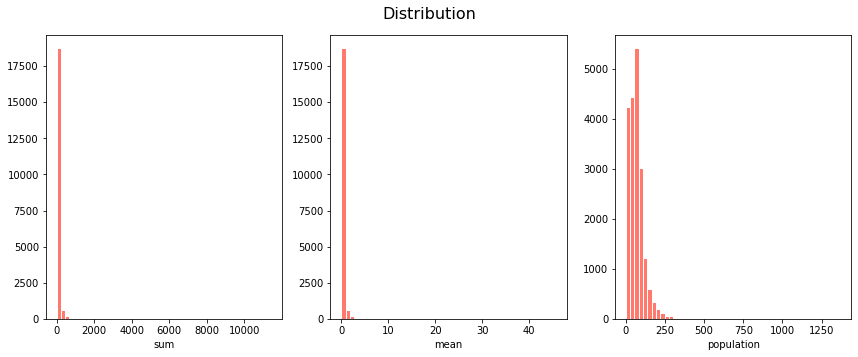

In [55]:
fig1, axes1 = plt.subplots(1,3,figsize=(12,5))
axes1[0].hist(final_all_cell_df['sum'],bins=50,color='xkcd:salmon',edgecolor="white")
axes1[0].set(xlabel='sum')

axes1[1].hist(final_all_cell_df['mean'],bins=50,color='xkcd:salmon',edgecolor="white")
axes1[1].set(xlabel='mean')

axes1[2].hist(final_all_cell_df['population'],bins=50,color='xkcd:salmon',edgecolor="white")
axes1[2].set(xlabel='population')

fig1.suptitle('Distribution',fontsize=16)
fig1.tight_layout(pad=1)

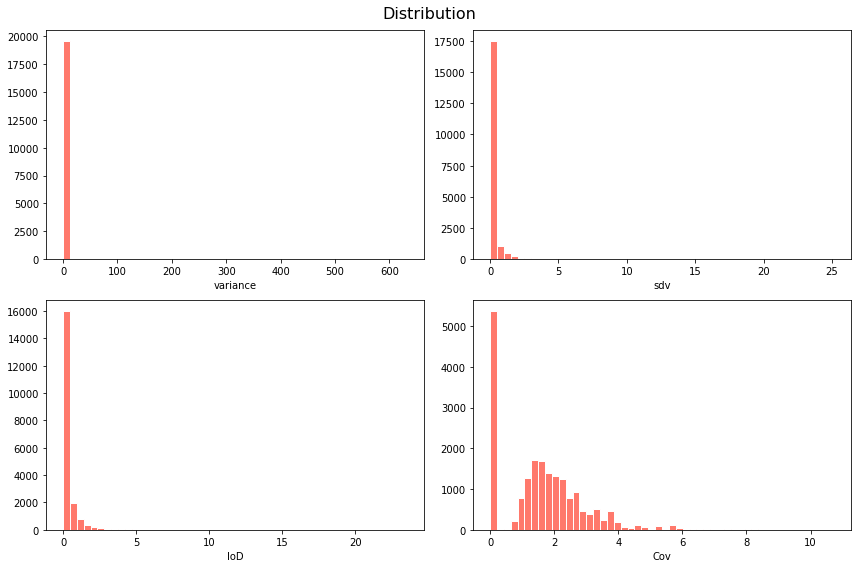

In [56]:
fig1, axes1 = plt.subplots(2,2,figsize=(12,8))
axes1[0,0].hist(final_all_cell_df['variance'],bins=50,color='xkcd:salmon',edgecolor="white")
axes1[0,0].set(xlabel='variance')

axes1[0,1].hist(final_all_cell_df['sdv'],bins=50,color='xkcd:salmon',edgecolor="white")
axes1[0,1].set(xlabel='sdv')

axes1[1,0].hist(final_all_cell_df['IoD'],bins=50,color='xkcd:salmon',edgecolor="white")
axes1[1,0].set(xlabel='IoD')

axes1[1,1].hist(final_all_cell_df['Cov'],bins=50,color='xkcd:salmon',edgecolor="white")
axes1[1,1].set(xlabel='Cov')

fig1.suptitle('Distribution',fontsize=16)
fig1.tight_layout(pad=1)

<AxesSubplot:>

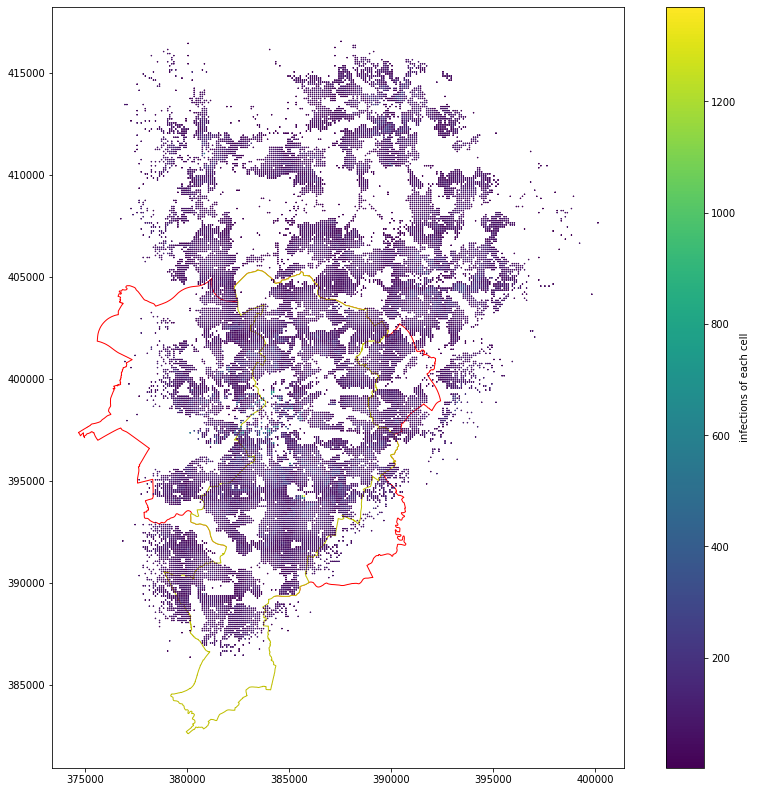

In [62]:
final_all_cell_gdf = gpd.GeoDataFrame(final_all_cell_df, geometry=gpd.points_from_xy(final_all_cell_df.x, final_all_cell_df.y, crs='epsg:4326'))
final_all_cell_gdf = final_all_cell_gdf.to_crs('epsg:27700')
    
fig, ax = plt.subplots(1,1, figsize=(15,14))
manchester_map.plot(ax=ax,edgecolor='r',facecolor= 'white',linewidth=1)
man.plot(ax=ax,edgecolor='y',facecolor= 'white',linewidth=1)
final_all_cell_gdf.plot(ax=ax,column='population',marker='*', markersize=0.5,legend=True,legend_kwds={'label': "infections of each cell",
                        'orientation': "vertical"})

In [58]:
final_all_cell_gdf.to_file('new_final_all_cell_gdf.gpkg', driver='GPKG')

In [59]:
test1 = gpd.read_file('new_final_all_cell_gdf.gpkg')

<AxesSubplot:>

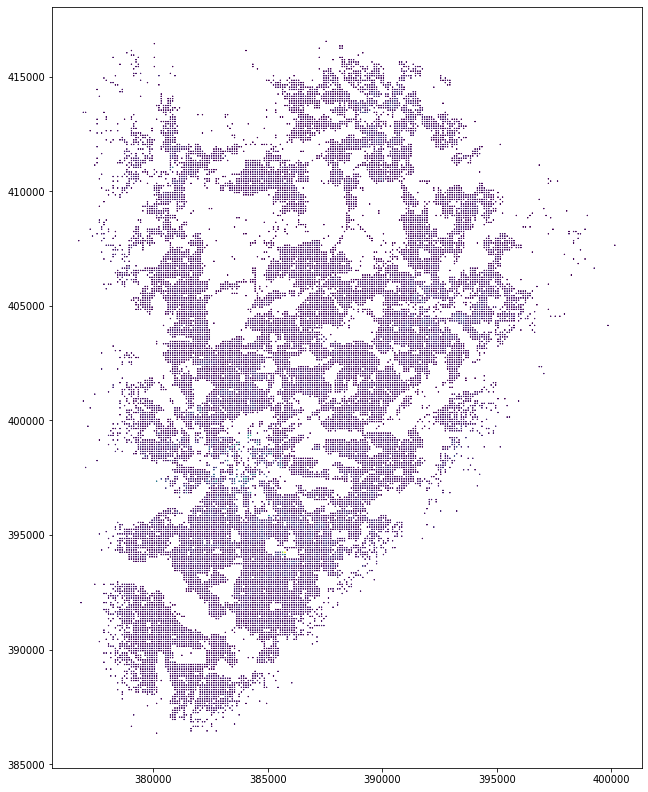

In [60]:
test1.plot(column='population',marker='*', markersize=0.25,figsize=(18,14))

In [13]:
def cell_coordinate(m,n):
    
    #cell_coord = {}
    cell_DataFrame = pd.DataFrame()
    for i in range(m,n):
        if i <10:
            url = './DV_CSC8626_Data_Wrangled/Datafile_00' + str(i) +'.csv'
        elif i<100:
            url = './DV_CSC8626_Data_Wrangled/Datafile_0' + str(i) +'.csv'
        else:
            url = './DV_CSC8626_Data_Wrangled/Datafile_' + str(i) +'.csv'
        
        data = pd.read_csv(url)
        cell_DataFrame = cell_DataFrame.append(data)
        

        
        
        #for j in range(len(data)):
            
            #cell_dict[some_key] = my_dict.get(some_key, 0)
            
           # cell_dic[data.iloc[j].cell_id] = cell_dic.get(data.iloc[j].cell_id, 0)
            
            #cell_dic[data.iloc[j].cell_id] = cell_dic[data.iloc[j].cell_id] + data.iloc[j].u
            
    return cell_DataFrame.drop_duplicates(subset=['cell_id'])

In [17]:
a = cell_coordinate(0,250)

In [18]:
a.head()

,x,y,cell_id,population,infected_DM_0,infected_DM_1,infected_DM_2,infected_DM_3,u,var,sd,IoD,CoV
0,-2.265540,53.420453,6.504529e+18,22,1,0,0,0,0.25,0.250000,0.500000,1.000000,2.000000
1,-2.265596,53.429442,8.685601e+18,38,1,0,0,0,0.25,0.250000,0.500000,1.000000,2.000000
2,-2.265664,53.440228,-6.954263e+18,58,0,0,0,2,0.50,1.000000,1.000000,2.000000,2.000000
3,-2.262437,53.405180,6.558309e+18,70,0,0,1,0,0.25,0.250000,0.500000,1.000000,2.000000
4,-2.262481,53.412371,-7.941757e+17,17,1,1,0,2,1.00,0.666667,0.816497,0.666667,0.816497


In [19]:
a = a[['cell_id','x','y','population']]

In [20]:
a

,cell_id,x,y,population
0,6.504529e+18,-2.265540,53.420453,22
1,8.685601e+18,-2.265596,53.429442,38
2,-6.954263e+18,-2.265664,53.440228,58
3,6.558309e+18,-2.262437,53.405180,70
4,-7.941757e+17,-2.262481,53.412371,17
...,...,...,...,...
4614,-5.037014e+18,-2.103496,53.610359,21
4675,-1.743019e+18,-2.116895,53.536643,4
4710,-7.568557e+18,-2.076160,53.538473,49
4736,-4.366653e+18,-2.098854,53.564523,14


In [56]:
test_30 = data_aggregate(0,30)

In [66]:
test_30.sort_values(by='sum')

,cell_id,sum
12820,6.050159e+18,0.25
9699,3.404946e+18,0.25
9697,-7.983806e+18,0.25
9696,5.494274e+18,0.25
9695,-7.317789e+18,0.25
...,...,...
121,-9.079079e+18,971.25
199,5.363137e+18,1019.50
482,-2.624143e+18,1062.75
52,4.947301e+18,1134.00


(array([1.0154e+04, 9.1000e+02, 4.8900e+02, 3.1800e+02, 2.3000e+02,
        1.6700e+02, 1.2400e+02, 9.5000e+01, 7.0000e+01, 3.4000e+01,
        3.5000e+01, 2.1000e+01, 1.5000e+01, 1.0000e+01, 2.0000e+01,
        1.1000e+01, 9.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00,
        8.0000e+00, 4.0000e+00, 0.0000e+00, 6.0000e+00, 4.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.00

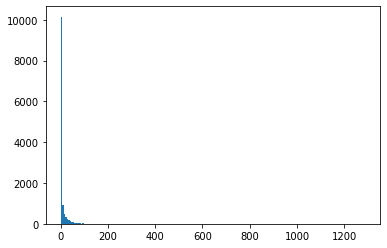

In [67]:
plt.hist(test_30['sum'],bins=200)

In [68]:
test_30_pdf = pd.merge(test_30, a, how='outer', on = 'cell_id')

In [69]:
test_30_pdf

,cell_id,sum,x,y
0,6.504529e+18,47.00,-2.265540,53.420453
1,8.685601e+18,42.00,-2.265596,53.429442
2,-6.954263e+18,35.25,-2.265664,53.440228
3,6.558309e+18,27.00,-2.262437,53.405180
4,-7.941757e+17,20.50,-2.262481,53.412371
...,...,...,...,...
12816,-8.919018e+18,0.25,-2.185929,53.452064
12817,-6.710937e+18,0.25,-2.288470,53.473433
12818,-2.011770e+18,0.25,-2.239940,53.416912
12819,-7.521063e+18,0.25,-2.285705,53.510292


In [75]:
test_30_pdf

,cell_id,sum,x,y,geometry
0,6.504529e+18,47.00,-2.265540,53.420453,POINT (-2.26554 53.42045)
1,8.685601e+18,42.00,-2.265596,53.429442,POINT (-2.26560 53.42944)
2,-6.954263e+18,35.25,-2.265664,53.440228,POINT (-2.26566 53.44023)
3,6.558309e+18,27.00,-2.262437,53.405180,POINT (-2.26244 53.40518)
4,-7.941757e+17,20.50,-2.262481,53.412371,POINT (-2.26248 53.41237)
...,...,...,...,...,...
12816,-8.919018e+18,0.25,-2.185929,53.452064,POINT (-2.18593 53.45206)
12817,-6.710937e+18,0.25,-2.288470,53.473433,POINT (-2.28847 53.47343)
12818,-2.011770e+18,0.25,-2.239940,53.416912,POINT (-2.23994 53.41691)
12819,-7.521063e+18,0.25,-2.285705,53.510292,POINT (-2.28570 53.51029)


In [82]:
test_30_pdf_select = test_30_pdf[test_30_pdf['sum']>100]

In [86]:
test_30_pdf_select

,cell_id,sum,x,y,geometry
5,-5.441154e+18,158.00,-2.262536,53.421359,POINT (-2.26254 53.42136)
10,1.878074e+18,102.25,-2.259511,53.418669,POINT (-2.25951 53.41867)
42,-2.326151e+18,123.00,-2.285059,53.414116,POINT (-2.28506 53.41412)
43,3.087112e+18,412.75,-2.283519,53.408727,POINT (-2.28352 53.40873)
45,4.224243e+18,120.75,-2.281955,53.399742,POINT (-2.28195 53.39974)
...,...,...,...,...,...
1533,1.001503e+18,104.50,-2.247798,53.474423,POINT (-2.24780 53.47442)
1542,-1.266090e+18,110.50,-2.249047,53.430376,POINT (-2.24905 53.43038)
1646,6.181045e+18,156.00,-2.241767,53.473536,POINT (-2.24177 53.47354)
1673,8.149676e+18,124.75,-2.238723,53.468149,POINT (-2.23872 53.46815)


<AxesSubplot:>

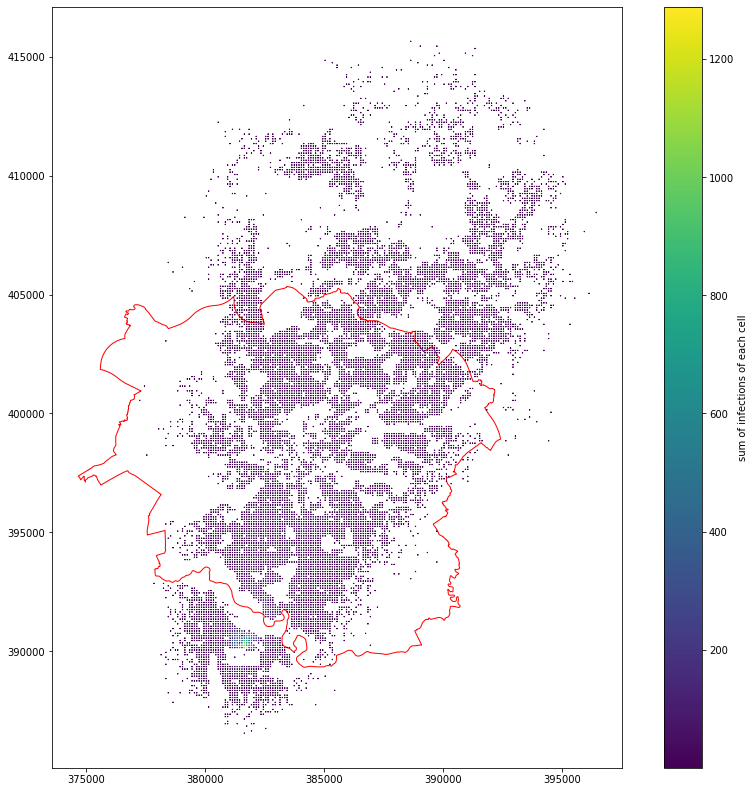

In [84]:
gdf_test_30 = gpd.GeoDataFrame(test_30_pdf, geometry=gpd.points_from_xy(test_30_pdf.x, test_30_pdf.y, crs='epsg:4326'))
gdf_test_30 = gdf_test_30.to_crs('epsg:27700')
    
fig, ax = plt.subplots(1,1, figsize=(15,14))
manchester_map.plot(ax=ax,edgecolor='r',facecolor= 'white',linewidth=1)
gdf_test_30.plot(ax=ax,column='sum',marker='*', markersize=0.25,legend=True,legend_kwds={'label': "sum of infections of each cell",
                        'orientation': "vertical"})

<AxesSubplot:>

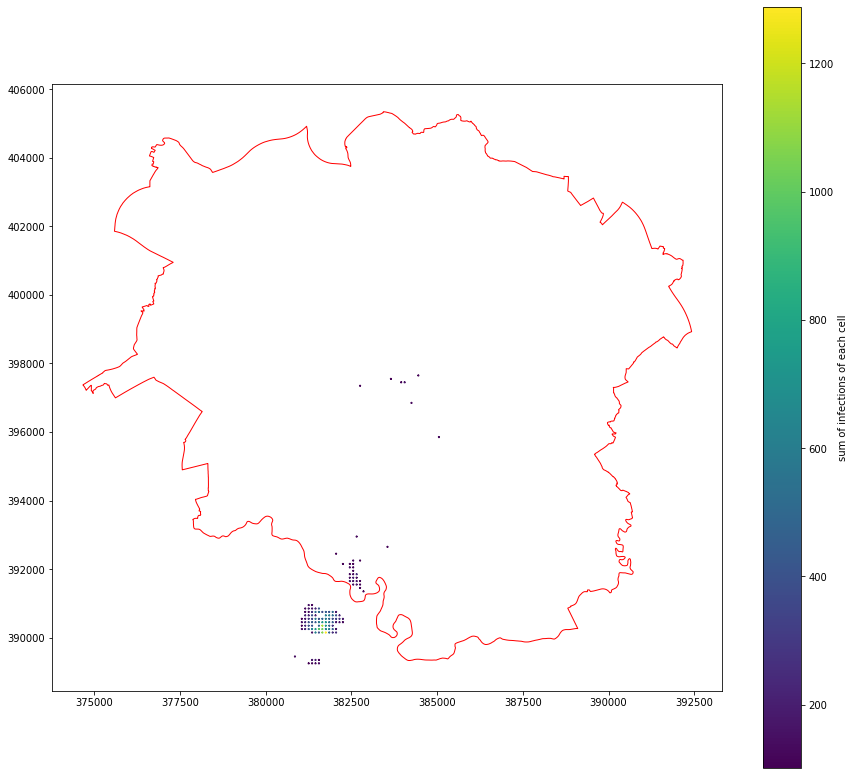

In [85]:
gdf_test_30_select = gpd.GeoDataFrame(test_30_pdf_select, geometry=gpd.points_from_xy(test_30_pdf_select.x, test_30_pdf_select.y, crs='epsg:4326'))
gdf_test_30_select = gdf_test_30_select.to_crs('epsg:27700')
    
fig, ax = plt.subplots(1,1, figsize=(15,14))
manchester_map.plot(ax=ax,edgecolor='r',facecolor= 'white',linewidth=1)
gdf_test_30_select.plot(ax=ax,column='sum',marker='*', markersize=2,legend=True,legend_kwds={'label': "sum of infections of each cell",
                        'orientation': "vertical"})

In [141]:
gdf_test_100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17016 entries, 0 to 17015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   cell_id   17016 non-null  float64 
 1   sum       17016 non-null  float64 
 2   x         17016 non-null  float64 
 3   y         17016 non-null  float64 
 4   geometry  17016 non-null  geometry
dtypes: float64(4), geometry(1)
memory usage: 797.6 KB


In [142]:
gdf_test_100.to_file('test_100_geo.gpkg', driver='GPKG')

In [143]:
test = gpd.read_file('test_100_geo.gpkg')

<AxesSubplot:>

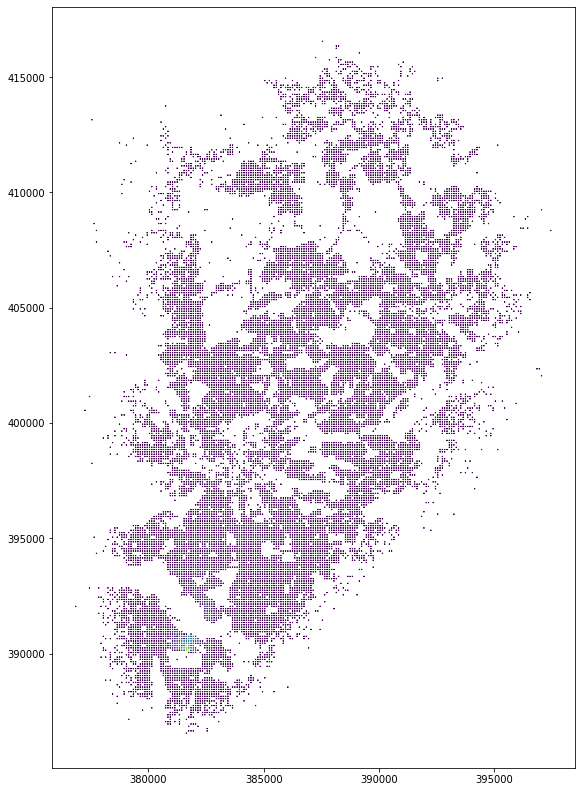

In [147]:
test.plot(column='sum',marker='*', markersize=0.25,figsize=(18,14))

<AxesSubplot:>

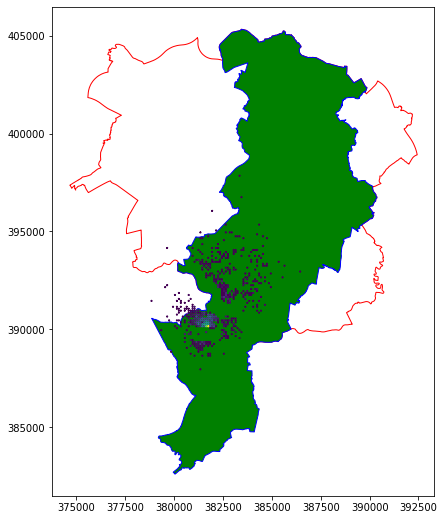

In [41]:
fig, ax = plt.subplots(1,1, figsize=(12,9))


manchester_map.plot(ax=ax,edgecolor='r',facecolor= 'white',linewidth=1)
man.plot(ax=ax,edgecolor='b',facecolor= 'g',linewidth=1)
gdf_data_000.plot(ax=ax,column='u',marker='*', markersize=2,legend=False,legend_kwds={'label': "Natural Log of Price per Night ($)",
                        'orientation': "vertical"})
